# Training a Model

In [1]:
import pandas as pd
import sklearn
import numpy as np

from sklearn import linear_model

df=pd.read_pickle('ldl_data.pkl')

features=['TC','TG','HDL']

target='DIRECT LDL'

model=linear_model.LinearRegression()

model.fit(df[features],df[target])

for i in range(len(model.coef_)):
    print(str(model.coef_[i])+'  '+features[i],end='   +   ')
print(str(model.intercept_))

0.976492099019  TC   +   -0.191270824043  TG   +   -0.670215727562  HDL   +   -9.11748553308


## Friedewald's formula:
**LDL** = **TC** - (0.2) **TG** - **HDL** 

## The equation produced for the Manipal population is:
**LDL** = (0.976)**TC** - (0.19)**TG** - (0.67)**HDL** - 9.12


# Visualizations

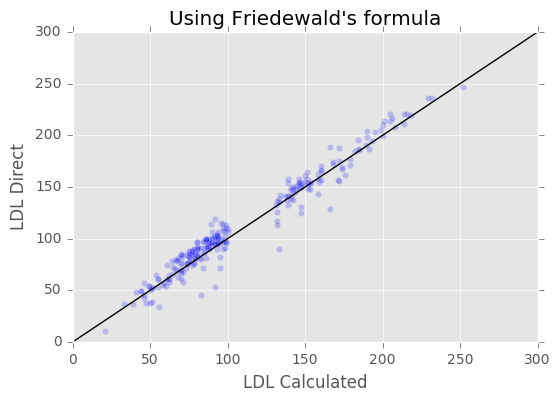

In [2]:
import matplotlib.pyplot as plt

a=np.arange(300)

plt.style.use("ggplot")
plt.scatter(df['LDL(Calc)'],df['DIRECT LDL'],alpha=0.2)
plt.xlabel('LDL Calculated')
plt.ylabel('LDL Direct')
plt.xlim((0,300))
plt.ylim(0,300)
plt.xticks()
plt.plot(a,c='black')
plt.title("Using Friedewald's formula")
plt.show()

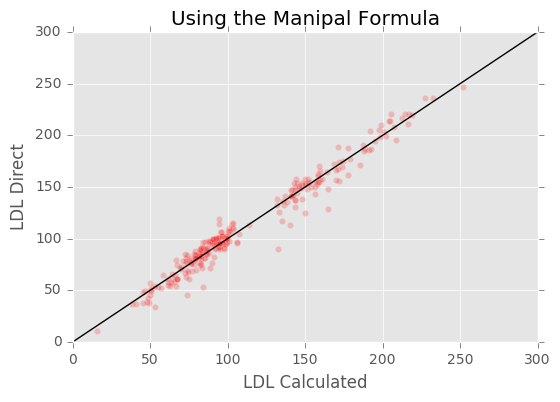

In [3]:
plt.scatter((model.predict(df[features])),df['DIRECT LDL'],c = 'r',alpha=0.2)
plt.xlabel('LDL Calculated')
plt.ylabel('LDL Direct')
plt.xlim((0,300))
plt.ylim(0,300)
plt.plot(a,c='black')
plt.title('Using the Manipal Formula')
plt.show()

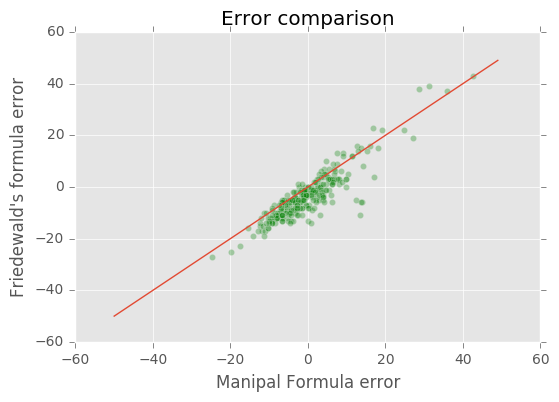

In [4]:
error_model = model.predict(df[features]) - df['DIRECT LDL']
error_eqn = df['LDL(Calc)'] - df['DIRECT LDL']

plt.scatter(error_model,error_eqn,c='g',alpha = 0.3)
plt.plot(np.arange(-50,50),np.arange(-50,50))
plt.xlabel('Manipal Formula error')
plt.ylabel("Friedewald's formula error")
plt.title("Error comparison")
plt.show()

As we can see, most points lie on the bottom right. This implies that the Manipal Formula error is lesser than the Friedewald's formula

# Comparison of equations

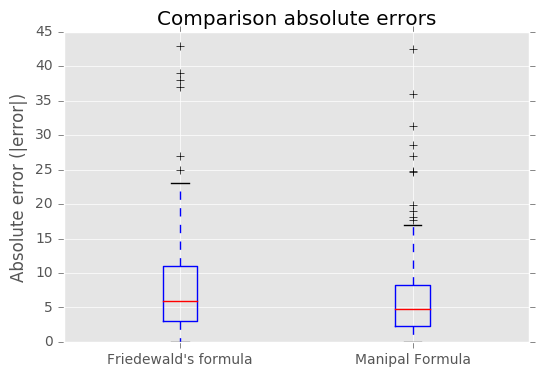

In [5]:
means = np.array([np.mean(np.abs(error_eqn)),np.mean(np.abs(error_model))])
std = np.array([np.std(np.abs(error_eqn)),np.std(np.abs(error_model))])

plt.boxplot([np.abs(error_eqn),np.abs(error_model)])
plt.xticks([1,2],("Friedewald's formula",'Manipal Formula'))
plt.ylabel('Absolute error (|error|)')
plt.title("Comparison absolute errors")
plt.show()

As we can infer from the boxplot, the Manipal formula performs better than the Friedewald's formula in the given population of 225 people.